In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import datetime
import scipy.stats
from scipy.stats import norm

In [2]:
fh = open('boston_housing.txt')
data = fh.readlines()

In [3]:
# extracting column name from the data source
import re
col_names = []
for i in range(7,21):
    col_name = re.search('\S+',data[i]).group()
    col_names.append(col_name)

print(col_names)

['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']


In [4]:
# extracting the vales of rows from the data soure and saving it in the list so that we can easily apply list finctions on them to mould data to our need
data_ls = []
for j in range(22,len(data)):
    data_ls.append(re.findall("[0-9.]+",data[j]))

In [5]:
# creating list in such a way that rows has 14 elements as the number of columns
end = len(data_ls)
rows = []
for j in range(0,end,2):
    rows.append(data_ls[j] + data_ls[j + 1])

In [6]:
# converting the string values to float so that in future we can finter it, sort it without further treatment
for i in range(len(rows)):
    rows[i] = [float(j) for j in rows[i]]

In [7]:
dict_data = {}
for i in col_names:
    dict_data[i] = rows[:][0]

In [8]:
# creating dataframe from the data extracted from csv file from the link and fitering it as done in previous some steps
boston_df = pd.DataFrame(rows, columns=col_names)
boston_df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


## Task 4

#### 1. For the "Median value of owner-occupied homes - MEDV" provide a boxplot 

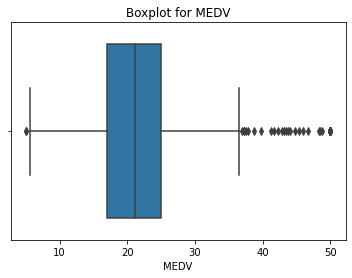

In [9]:
sns.boxplot(x='MEDV', data = boston_df)
plt.title("Boxplot for MEDV")
plt.show()

#### 2. Provide a  histogram for the Charles river variable

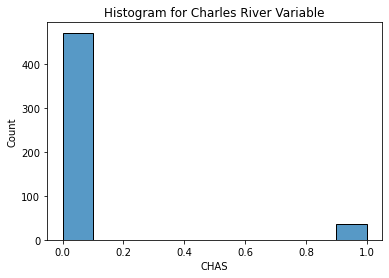

In [10]:
sns.histplot(data=boston_df.CHAS, bins = 10)
plt.title("Histogram for Charles River Variable")
plt.show()

Observation: Mostly tracts dosen't bound Charles River

#### 3. Provide a boxplot for the MEDV variable vs the AGE variable. (Discretize the age variable into three groups of 35 years and younger, between 35 and 70 years and 70 years and older)

In [11]:
# creating columns of age group
boston_df.loc[(boston_df["AGE"] <= 35),'age_group'] = '35 years and younger'
boston_df.loc[(boston_df["AGE"] > 35) & (boston_df["AGE"]<70),'age_group'] = 'between 35 and 70 years'
boston_df.loc[(boston_df["AGE"] >= 70),'age_group'] = '70 years and older'

boston_df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,age_group
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0,between 35 and 70 years
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6,70 years and older
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7,between 35 and 70 years
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4,between 35 and 70 years
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2,between 35 and 70 years
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4,between 35 and 70 years
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6,70 years and older
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9,70 years and older
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0,70 years and older


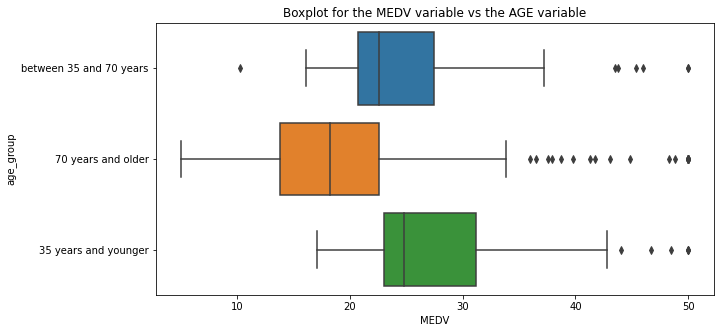

In [12]:
plt.figure(figsize=(10,5))
sns.boxplot(x=boston_df.MEDV, y=boston_df.age_group, data=boston_df)
plt.title("Boxplot for the MEDV variable vs the AGE variable")
plt.show()

Observation : People who are 35 year and younger prefer to own-occupy costly homes where as people older than 70 years prefer cheap homes compared to other two age gropus.

#### 4. Provide a scatter plot to show the relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town. What can you say about the relationship?

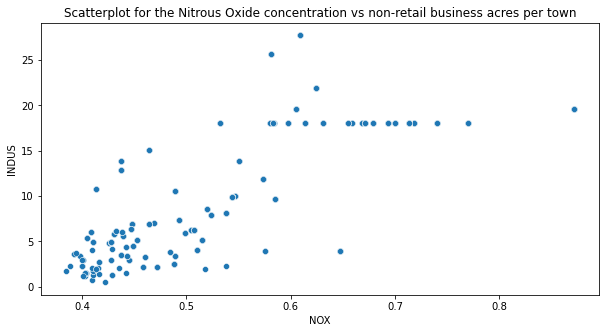

In [13]:
plt.figure(figsize=(10,5))
sns.scatterplot(data=boston_df, x = 'NOX', y = 'INDUS')
plt.title("Scatterplot for the Nitrous Oxide concentration vs non-retail business acres per town")
plt.show()

Observatioin : Upto NOx concentration of 0.6ppm there is linear relation-ship between INDUS and NOX after that for higher NOX concentration INDUS is limited to apppx. 17.5 acres.

#### 5. Create a histogram for the pupil to teacher ratio variable

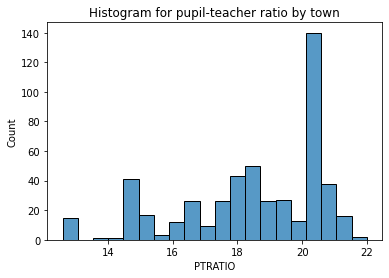

In [14]:
sns.histplot(data=boston_df.PTRATIO, bins = 20)
plt.title("Histogram for pupil-teacher ratio by town")
plt.show()

Observation : For the range of 20 to 21, pupil-teacher ratio is highest

## Task 5: Use the appropriate tests to answer the questions provided.
        For each of the following questions Be sure to:
            - State your hypothesis.
            - Use α = 0.05
            - Perform the test Statistics.
            - State the conclusion from the test.

In [15]:
boston_df.head(10)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,age_group
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0,between 35 and 70 years
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6,70 years and older
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7,between 35 and 70 years
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4,between 35 and 70 years
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2,between 35 and 70 years
5,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3.0,222.0,18.7,394.12,5.21,28.7,between 35 and 70 years
6,0.08829,12.5,7.87,0.0,0.524,6.012,66.6,5.5605,5.0,311.0,15.2,395.60,12.43,22.9,between 35 and 70 years
7,0.14455,12.5,7.87,0.0,0.524,6.172,96.1,5.9505,5.0,311.0,15.2,396.90,19.15,27.1,70 years and older
8,0.21124,12.5,7.87,0.0,0.524,5.631,100.0,6.0821,5.0,311.0,15.2,386.63,29.93,16.5,70 years and older
9,0.17004,12.5,7.87,0.0,0.524,6.004,85.9,6.5921,5.0,311.0,15.2,386.71,17.10,18.9,70 years and older


### Question 1: Is there a significant difference in median value of houses bounded by the Charles river or not? (T-test for independent samples)

$\mu_{b}$ = mean value of MEDV bounded by Charles River <br>
$\mu_{nb}$ = mean value of MEDV not bounded by Charles River <br>

State the Hypothesis:
*   Null hypothesis ($H_{0}$) : $\mu_{b}$ = $\mu_{nb}$ <br>
*   Alternate hypothesis ($H_{1}$) : $\mu_{b}$ $\neq$ $\mu_{nb}$

In [16]:
not_bounded = boston_df.MEDV[boston_df.CHAS == 0]
bounded = boston_df.MEDV[boston_df.CHAS == 1]

In [17]:
scipy.stats.ttest_ind(bounded, not_bounded)

Ttest_indResult(statistic=3.996437466090509, pvalue=7.390623170519905e-05)

In [18]:
pvalue=7.390623170519905e-05
alp = 0.05

alp < pvalue

False

**Conclusion :** As p-value is less than alpha value so, we reject $H_{0}$ that $\mu_{b}$ = $\mu_{nb}$ and can conclude that there is enough proof that area bounded by Charles River effects the value of the homes.

### Question 2: Is there a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)? (ANOVA)

$\mu_{low}$ = mean value of MEDV for age group 'younger than 35 years' <br>
$\mu_{med}$ = mean value of MEDV for age group 'between 35 years and 70 years' <br>
$\mu_{high}$ = mean value of MEDV for age group 'older than 70 years' <br>

State the Hypothesis:
*   Null hypothesis ($H_{0}$) : $\mu_{low}$ = $\mu_{med}$ = $\mu_{high}$ <br>
*   Alternate hypothesis ($H_{1}$) : atleast one of the mean differs

In [19]:
low = boston_df[boston_df["age_group"] == '35 years and younger']["MEDV"]
mid = boston_df[boston_df["age_group"] == 'between 35 and 70 years']["MEDV"]
high = boston_df[boston_df["age_group"] == '70 years and older']["MEDV"]


In [20]:
f_stats, p_value = scipy.stats.f_oneway(low,mid,high,axis=0)

print("F-Statistic={0}, P-value={1}".format(f_stats,p_value))

F-Statistic=36.40764999196599, P-value=1.7105011022702984e-15


In [21]:
Pvalue=1.7105011022702984e-15
alp = 0.05

Pvalue > alp

False

**Conclusion :** As P-value is less than alpha, so we can reject $H_{0}$ that $\mu_{low}$ = $\mu_{med}$ = $\mu_{high}$, and can conclude that there is enough evidence to proof the age plays a important factor for mean value of owner-oocupied home.

### Question 3: Can we conclude that there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town? (Pearson Correlation)

State Hypothesis:
*   $H_{0}$ : Nitric oxide concentrations and proportion of non-retail business acres per town are NOT related
*   $H_{1}$ : Nitric oxide concentrations and proportion of non-retail business acres per town are realated

Since they are both continuous variables we can use a pearson correlation test and draw a scatter plot

<AxesSubplot:xlabel='NOX', ylabel='INDUS'>

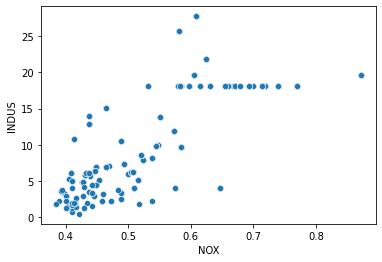

In [22]:
sns.scatterplot(x="NOX", y="INDUS", data=boston_df)

In [23]:
pearson,p_value = scipy.stats.pearsonr(boston_df['INDUS'], boston_df['NOX'])
print("Pearson Coefficient value={0}, P-value={1}".format(pearson,p_value))

Pearson Coefficient value=0.763651446920915, P-value=7.913361061239593e-98


In [24]:
p_value > alp

False

**Conclusion:** Since the p-value  (Sig. (2-tailed))  < 0.05, we reject  the Null hypothesis and conclude that there  exists a relationship between  Nitric oxide concentrations and proportion of non-retail business acres per town.

### Question 4: What is the impact of an additional weighted distance to the five Boston employment centres on the median value of owner occupied homes? (Regression analysis)

State Hypothesis:
*   $H_{0}$ : $\beta_{0}$ (there is NO impact of an additional weighted distance to the five Boston employment centres on the median value of owner occupied homes)
*   $H_{1}$ : $\beta_{0} \neq 0$ (there is impact of an additional weighted distance to the five Boston employment centres on the median value of owner occupied homes)

In [25]:
## X is the input variables (or independent variables)
X = boston_df['DIS']
## y is the target/dependent variable
y = boston_df['MEDV']
## add an intercept (beta_0) to our model
X = sm.add_constant(X) 

model = sm.OLS(y, X).fit()
predictions = model.predict(X)

# Print out the statistics
model.summary()

C:\Users\dahir\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Sun, 24 Apr 2022   Prob (F-statistic):           1.21e-08
Time:                        16:26:26   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.000      16.784      19.996
DIS            1.0916      0.188      5.795      0.000       0.722       1.462
==============================================================================
Omnibus:                      139.779   Durbin-Watson:                   0.570
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              305.104
Skew:                           1.466   Prob(JB):                     5.59e-67
Kurtosis:                       5.424   Cond. No.                         9.32
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [26]:
P_value = 1.21e-08 # Prob (F-statistic)
alp = 0.05

print("P_value > alp :",P_value > alp)

print("Correlation Co-efficient : ", round(0.062**0.5, 4)) # R-squared:	0.062

P_value > alp : False
Correlation Co-efficient :  0.249


**Conclusion :** 
*   Since, p-value < 0.05, there is sufficient evidence that additional weighted distance to the five Boston employment centres has certainly some effect on the median value of owner occupied homes.
*   Correlation Co-efficient (ranges from -1[Perfect negative association] to 1[Perfect positive association] and 0 = no association) =  0.249, which suggests that there is corelation between DIS and MEDV but its not a strong association.